# Use Example QSub: How to Create a Conceptual Contours using Gallito API

This is the first example of using the `QSub` library. In this initial notebook, we will see how to define a *conceptual outline* from an LSA semantic space taking the semantic vectors from Gallito API.

## Import `QSub` and Install Dependencies

First, we must import the library and install its dependencies:

In [1]:
!git clone https://github.com/alejandrommingo/QSub.git

Cloning into 'QSub'...
remote: Enumerating objects: 158, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 158 (delta 78), reused 122 (delta 49), pack-reused 0
Receiving objects: 100% (158/158), 1013.76 KiB | 12.51 MiB/s, done.
Resolving deltas: 100% (78/78), done.


In [2]:
%cd QSub
!pip install .

/content/QSub
Processing /content/QSub
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 10.4 MB/s eta 0:00:00
  Created wheel for QSub: filename=QSub-0.1-py3-none-any.whl size=9468 sha256=f70097911440abc204a60954f251140d9e82be8ce0ec3fad51258ddd7e7b9c37
  Stored in directory: /tmp/pip-ephem-wheel-cache-5n7wnqy8/wheels/cd/2b/6e/ee1f8ffde451ff7345783973194d90055151c5af6d6ce70238
Successfully built QSub


## Data Loading for the Usage Example

Once the `QSub` library is installed, we will need to download the necessary data for the usage example. These data are hosted in a resource folder within the library itself, so we can use them directly. We make use of a predefined dataset for the cosines of the *superterm* and for the values of *semantic diversity* of the terms in the corpus, as calculating them for the entire linguistic corpus we are going to use would be very costly. These resources are only applicable to the example linguistic corpus in this notebook (`quantumlikespace_spanish`).

In [3]:
import QSub
import pkg_resources
import pandas as pd
import numpy as np

test_superterm_cosines_path = pkg_resources.resource_filename("QSub", "./../resources/superterm_cosines.csv")
test_superterm_cosines = pd.read_csv(test_superterm_cosines_path)
test_superterm_cosines = test_superterm_cosines.drop(test_superterm_cosines.columns[0], axis=1)
test_superterm_cosines = np.array(test_superterm_cosines)

test_h_df_path = pkg_resources.resource_filename("QSub", "./../resources/sp_vocab_semantic_diversity.csv")
test_h_df = pd.read_csv(test_h_df_path)
test_h_df = test_h_df.drop(test_h_df.columns[0], axis=1)

## Extraction of the *Conceptual Contour* of the Term "Palestinian".

In the following example, we will use the term "Palestinian" to define its conceptual outline in the LSA semantic space.

**Note:** This semantic space is already estimated, and we access it through `Gallito API`, a licensed API, so the `API_KEY` will be omitted in the example notebook.

We begin by importing the necessary functions from the `contours` and `semantic_spaces` modules:


In [5]:
from QSub.contours import deserved_neighbors, get_neighbors_matrix_gallito, neighbors_similarity
from QSub.semantic_spaces import get_word_vector_gallito, word_cosine_similarity

The function `get_neighbors_matrix_gallito` allows us to extract the vectors of the `n` most similar terms to the target term using the Gallito API. These vectors of semantic neighbors will form the outline of the target word. However, we still do not know how many neighbors our example word deserves, so we start with a total of 300 neighbors and will use a series of functions later to make the decision.

In [7]:
palestino_neighbors = get_neighbors_matrix_gallito("palestino", "API_KEY", "quantumlikespace_spanish", neighbors = 300)

Obteniendo vectores: 100%|██████████| 300/300 [00:16<00:00, 18.49it/s]


Once the tentative contour is defined, we will obtain the vector of the target term using the `get_word_vector_gallito` function, and its vector of similarities ordered from highest to lowest with the `neighbors_similarity` function. These elements will be essential for making a decision about the number of semantic neighbors that the outline deserves.

In [8]:
palestino_vector = get_word_vector_gallito("palestino", "API_KEY", "quantumlikespace_spanish")
palestino_cosines = neighbors_similarity(palestino_vector, palestino_neighbors)

Finally, the function `deserved_neighbors` informs us of the number of semantic neighbors that the outline of our target term deserves. This is based on the method developed by Martínez-Mingo et al. (2023).

**Note:** As the document of values in *semantic diversity* is lemmatized, it is common not to find the desired term. For this reason, a search system based on Levenshtein distance has been implemented, so a similar term will always be found, with the said term being returned at the end of the function.

Reference: Martínez-Mingo, A., Jorge-Botana, G., Martinez-Huertas, J. Á., & Albacete, R. O. (2023). Quantum projections on conceptual subspaces. Cognitive Systems Research, 82, 101154.

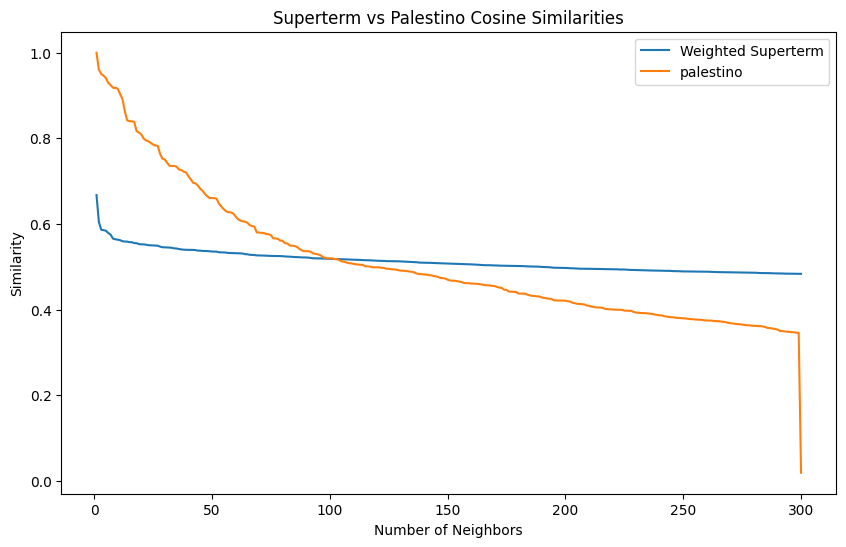

In [10]:
palestino_deserved = deserved_neighbors("palestino", test_h_df, test_superterm_cosines, np.array(list(palestino_cosines.values())))

If we print the result of the previous function, it will give us the number of deserved semantic neighbors for the target word:

In [12]:
print(palestino_deserved)

101


With this information, we can estimate the outline of our target word by using the function `get_neighbors_matrix_gallito` again:


In [14]:
palestino_contour = get_neighbors_matrix_gallito("palestino", "API_KEY", "quantumlikespace_spanish", neighbors = palestino_deserved)

Obteniendo vectores: 100%|██████████| 101/101 [00:05<00:00, 18.50it/s]


Now, the object `palestino_contour` has the 101 semantic neighbors of the target term, and their representation vectors in the LSA semantic space. This conceptual outline will be useful later to generate the subspace of the concept "Palestinian."

In [16]:
palestino_contour.keys()

dict_keys(['palestino', 'cisjordania', 'israelí', 'israel', 'gaza', 'jerusalén', 'estado_de_israel', 'hamás', 'franja_de_gaza', 'autoridad_palestina', 'hebreo', 'jerusalén_este', 'ramala', 'yihad_islámica', 'tel_aviv', 'sionista', 'altos_del_golán', 'ciudad_santa', 'gazatíes', 'haaretz', 'benjamín_netanyahu', 'fatah', 'acuerdos_de_oslo', 'árabes', 'golán', 'mahmud_abbas', 'netanyahu', 'benjamin_netanyahu', 'hezbolá', 'abbas', 'jordania', 'unrwa', 'partición', 'libanés', 'embajada_de_ee', 'árabe', 'líbano', 'chiíes', 'gazatí', 'olp', 'oriente_próximo', 'proyectil', 'lieberman', 'galilea', 'francotirador', 'chií', 'judío', 'egipto', 'liberación_de_palestina', 'jordán', 'jordana', 'judaísmo', 'haifa', 'suníes', 'jordano', 'castrense', 'beirut', 'iraní', 'iraquí', 'antiaéreo', 'likud', 'bélica', 'milicia', 'islam', 'siria', 'mosad', 'tierra_santa', 'observatorio_sirio_para_los_derechos_humanos', 'guardia_revolucionaria', 'damasco', 'franja', 'propalar', 'liga_árabe', 'irak', 'miliciano', '